# Introduction to the use of Jupyter with Python
**Anne Kværnø**

23.02.2018

(*Translated to English and adapted to TMA4215 by Brynjulf Owren August 21, 2018*)

## Innledning

Welcome to the course TMA4215 Numerical Mathematics, Autumn 2018. 
We shall rely on Jupyter for many purposes in this course, both material prepared by the teachers and projects/assignments prepared by the students. Jupyter is a web-based environment which makes it easy to write text and source code (Python) in the same document. 

In this note you get a short introduction to the most important constructions in Python. For those who know Matlab, have a look [NumPy for Matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html). 

All these notes can be downloaded an executed on your local computer.

### Using Jupyter notes 

A Jupyter note is composed from cells. These can either consist of text (like this one) or source code as shown below. Once you have copied this note to your own domain you may alter both the markup text and the code. Perhaps a good idea is to leave the text unchanged, but rather experiment with the code.
Of course you can also add new cells with your own notes or your own code or make new note books from scratch, possibly by copying from this or other note books.
A useful reference guide for markup language can be found [here](https://daringfireball.net/projects/markdown/syntax#list)

Below you find an example of a cell with code. You execute it by pressing *Shift+Enter*


In [1]:
a = 2
b = 14
c = a*b
print(c)

28


When you have executed a cell of code, the data are kept and can be reused 

In [2]:
print(a, b)

2 14


In [3]:
a = 8

## Numerical computations with Python:

Implementation of numerical algorithms is not necessarily very complicated, they essentially require the following: 

* Functions 
* Loops, especially for-loops. 
* Matrices and vectors. 
* Visualization (plotting) of results.

In this note we explain very briefly how we do this  

We need two modules:   
* [Numpy:](http://www.numpy.org) Arrays (matrices and vectors), and the most commonly used mathematical functions 
* [Matplotlib:](https://matplotlib.org) Graphs and figures.  

Necessary modules and functions must be imported and Jupyter is prepared for showing plots.
This cell must be executed before any other code in the note 

In [4]:
# Import required modules, and set parameters for plotting.
# Must always be run first!
%matplotlib inline    
from numpy import *               
from numpy.linalg import solve, norm  
from matplotlib.pyplot import *   

# The next lines set parameters for plotting.
# Feel free to experiment.
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

The parameters in `newparams` can be changed until you have a plot with font size and line thickness to your liking.  Try it out with the following plot:

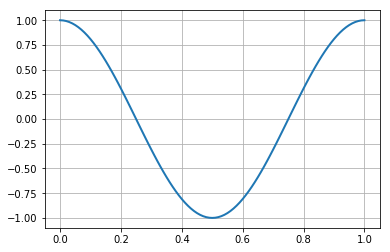

In [5]:
x = linspace(0,1,101)
plot(x, cos(2*pi*x));     # Use ; to supress text.
                          # Only required on the last line in a cell.

### Numpy: 
Numpy is handling vectors and matrices as 1- and 2-dimensional arrays respectively.
As opposed to Matlab, it is not distinguished between row and column vectors. 

In what follows we illustrate simple use of linear algebra in Python.
Let
$$ 
A = \begin{pmatrix} 1.4 & 2.2 & -1.0 \\ 1.6 & -2.7 & 1.2 \\ -3.2 & 1.2 &-1.8 \end{pmatrix}, 
\qquad 
\mathbf{y} = \begin{pmatrix} 1.0 \\ -2.0 \\ 3.0  \end{pmatrix}
$$

In [6]:
A = array([[1.4, 2.2, -1.0],        # A: A 2-dimensional array.
           [ 1.6, -2.7, 1.2],
           [ -3.2, 1.2, -1.8]])     
y = array([1.0, -2.0, 3.0])         # y: A 1-dimensional array.
print('A = \n', A)
print('\ny = ', y)

A = 
 [[ 1.4  2.2 -1. ]
 [ 1.6 -2.7  1.2]
 [-3.2  1.2 -1.8]]

y =  [ 1. -2.  3.]


In Python the indexing starts with 0, whereas the index in mathematics usually starts with 1. This means for instance that  $y_3$ (in mathematics) is y[2] in Python, and $a_{21}$ is A[1,0].

In [7]:
print(A[1,0])
print(y[2])
print(A[:,-1])

1.6
3.0
[-1.   1.2 -1.8]


If `a` and `b` are two arrays of the same size, the operation `*` will be and elementwise product. Similarly `a**p` means that every element in `a`  is raised to the power`p`:

In [8]:
a = array([1, 2, 3])
b = array([3, 4, 5])
print('a*b = ', a*b)
print('a**2 = ', a**2)

a*b =  [ 3  8 15]
a**2 =  [1 4 9]


A small selection of useful functions 
* `A@y` eller `dot(A,y)` : Matrix-vector multiplication. 
* `solve(A,b)` :  Solves a linear system of equations $ A \mathbf{x} = \mathbf{b} $. 
* `ones(n)` : Array of length $ n $ with 1's. 
* `zeros(n)` : Array of length $ n $ with 0's. 
* `len(x)` : Length of the first dimension of an array, e.g. number of rows for a matrix, and number of elements for a vector.
* `shape(A)` : The size of and array. Returns $(n, m)$ if $A\in \mathbb{R}^{n\times m}$. 
* `eye(n)` : An $ n \times n$ identity matrix.
* `linspace(a, b, n)` : Array with $n$ equidistant numbers between $a$ and $b$ inclusive.

Please try them out!

In [9]:
x = linspace(-1, 1, 11)
print(x)
m,n = shape(A)
print(m,n)

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
3 3


#### Norm of a vector
<a name="norm"></a>
Let $\mathbf{x}=[x_1,\cdots,x_2]\in \mathbb{R}^n$.  Two usual norms* are 

$$
 \|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}, \qquad \|\mathbf{x}\|_{\infty} = \max_i|x_i|. 
$$

In [10]:
x = array([1, -3, 2])
print( norm(x) )            # 2-norm
print( norm(x, inf) )       # Max-norm

3.7416573867739413
3.0


### Matplotlib
We demonstrate a simple use of Matplotlib through an example 

Plot the functions 

$$ f(x) = x^2 + 2x \qquad \text{and} \qquad g(x) = 2x\sin(2\pi x) $$

on the interval $-1 \leq x \leq 1$.

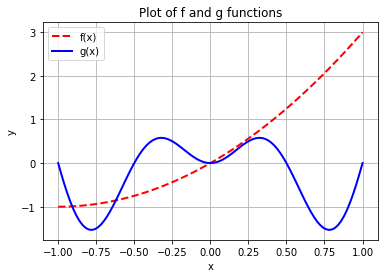

In [11]:
x = linspace(-1, 1, 101)      # Instantiate the "x-axis"
f = x**2 + 2*x
g = 2*x*sin(2*pi*x)
plot(x, f, 'r--')             # Plotting f with a dashed red line
plot(x, g, 'b-')              # Plotting g with a solid blue line 
xlabel('x')
ylabel('y')
title('Plot of f and g functions')
legend(['f(x)', 'g(x)']);

### Loops and functions

There is no  `end`-statement in Python. 
The content of functions or control structures are signified by indentation. 
When the indentation terminates, the function or control structure is terminated.

Below we demonstrate for-loops and functions through some minor examples 

### for-loops
A cell with a  `for`-loop can look as follows

In [12]:
x = array([1.3, 4.6, 2.1, -5.8])
n = len(x)
print('n = ', n, '\n')
for i in range(n):
    print('i = {:2d}, x = {:6.2f}'.format(i, x[i]))    # Formatted output
print('\nAnd this terminates the loop')

n =  4 

i =  0, x =   1.30
i =  1, x =   4.60
i =  2, x =   2.10
i =  3, x =  -5.80

And this terminates the loop


Note that the construction
`for i in range(n)` corresponds to $i=0,1,\dotsc,n-1$. 
### Functions

Throw a ball in the air. Ignore air resistance. If the initial velocity is $v_0$, the height and velocity of the ball will be

\begin{align}
    y(t) &= v_0t - \frac{1}{2} g t^2 && \text{height} \\
    v(t) &= v_0 - gt && \text{velocity}
\end{align}

where $g$ is the gravitational constant. In Python this function can be written as 

In [13]:
def ball(t, v0=0, g=9.81):
    y = v0*t - 0.5*g*t**2
    v = v0 - g*t
    return y, v

Here $v_0$ and $g$ are given defaults values.

We give some examples of use of this function

What is velocity and position after 2 seconds, when the initial velocity is 0?

In [14]:
t = 2.0
y1, v1 = ball(t)        # After 2 seconds, no initial velocity
print('v0=',0.0,',  t=', t, ',  y=', y1, ',   v=', v1,)

v0= 0.0 ,  t= 2.0 ,  y= -19.62 ,   v= -19.62


What is velocity and position after 2 seconds, when the initial velocity is 1 m/s? 

In [15]:
v_start = 1.0
y2, v2 = ball(t, v0=v_start)  # After 2 seconds, given v0=1 m/s
print('v0=', v_start,',  t=', t, ',  y=', y2, ',   v=', v2)

v0= 1.0 ,  t= 2.0 ,  y= -17.62 ,   v= -18.62


And what is velocity and position after 2 seconds if you repeat the experiment on the moon? 

In [16]:
y3, v3 = ball(t, v0=v_start, g=1.625)  
print('v0=', 1.0,',  t=', t, ',  y=', y3, ',   v=', v3, '  on the moon.')

v0= 1.0 ,  t= 2.0 ,  y= -1.25 ,   v= -2.25   on the moon.


### Help!

* Have a look in the menu line in Jupyter, see if you find what you need there 
* For help for a python function, write ?function name. 